In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [5]:
data = pd.read_csv('rankingcard.csv',index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
##去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [8]:
#删除之后重置索引
data.index = range(data.shape[0])

In [9]:
##缺失值处理
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)

In [10]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [11]:
from sklearn.ensemble import RandomForestRegressor as Rfr
#随机森林填补缺失
def fill_missing_rf(x,y,to_fill):
    df = x.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.iloc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.loc[Ytrain.index,:]
    Xtest = df.loc[Ytest.index,:]
    
    rfr = Rfr(n_estimators=100).fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [12]:
X = data.iloc[:,1:]
Y = data['SeriousDlqin2yrs']
X.shape

(149391, 10)

In [13]:
y_pred = fill_missing_rf(X,Y,"MonthlyIncome")

In [14]:
y_pred

array([0.15, 0.38, 0.1 , ..., 0.24, 0.11, 0.  ])

In [15]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'] = y_pred

In [16]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [17]:
#处理异常值
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5426.834909,13233.474389,0.0,0.0,0.190000,1800.000000,4430.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [18]:
(data['age']==0).sum()

1

In [19]:
data = data[data['age']!=0]

In [20]:
data[data.loc[:,'NumberOfTimes90DaysLate'] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [21]:
data = data[data.loc[:,'NumberOfTimes90DaysLate'] < 90]
data.shape

(149165, 11)

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.030033,0.153615,0.553698,50708.0
age,149165.0,52.331076,14.714114,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.178211,0.368619,0.876994,329664.0
MonthlyIncome,149165.0,5430.603855,13242.359475,0.0,1800.000000,4441.000000,7420.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.000000,0.000000,0.000000,11.0


在经过去除重复值、缺失值和异常值处理后，各个特征的量纲是不均匀的，理应进行统一量纲，但统一量纲后，业务人员无法理解标准化后的特征数据是何含义，所以不能对数据进行归一化和标准化

In [23]:
#样本不均衡问题
x = data.iloc[:,1:]
y = data.iloc[:,0]
y

0         1
1         0
2         0
3         0
4         0
         ..
149386    0
149387    0
149388    0
149389    0
149390    0
Name: SeriousDlqin2yrs, Length: 149165, dtype: int64

In [24]:
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

由y的分布可看出，数据为严重的不均衡数据。

### 逻辑回归中使用最多的是上采样方法来平衡样本

In [25]:
import imblearn
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state=42)
X,Y = sm.fit_resample(x,y)
n_sample_ = X.shape[0]

n_1_sample = Y.value_counts()[1]
n_0_sample = Y.value_counts()[0]
print('样本个数:{},1占{:.2%},0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数:278584,1占50.00%,0占50.00%


In [27]:
X.shape

(278584, 10)

In [28]:
pd.Series(Y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

## 分训练集和测试集

In [29]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,Y,test_size=0.3,random_state=50)

In [30]:
model_data = pd.concat([Y_train,X_train],axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [31]:
vali_data = pd.concat([Y_vali,X_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [32]:
model_data.to_csv(r'model_data.csv')
vali_data.to_csv(r'vali_data.csv')

## 分箱

分箱步骤：
1. 首先把连续型变量分成一组数量较多的分类型变量，比如将几万个样本分成100或50组
2. 确保每一组都药包含两种类别的样本，否则IV值将无法计算
3. 对相邻的组进行卡方检验，检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为之
4. 让一个特征分别分成[2.3.4....20]箱，观察每个分箱个数下的IV值如何变化，找出合适的箱个数
5. 分箱完毕后，计算每个箱的WOE值，bad%，观察分箱效果

完成后，可以对各个特征都进行分箱，观察每个特征的IV值，以此挑选特征

In [33]:
#等频分箱
#'age'为例子
model_data['age']

0         44
1         26
2         68
3         54
4         47
          ..
195003    46
195004    52
195005    35
195006    27
195007    73
Name: age, Length: 195008, dtype: int64

In [34]:
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True,q=20)
'''pd.qcut:基于分位数的分箱函数，本质是将连续型变量离散化，只能处理一维数据返回箱子的上下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上下限
'''
model_data['qcut']

0           (43.0, 45.0]
1         (20.999, 28.0]
2           (64.0, 68.0]
3           (52.0, 54.0]
4           (45.0, 47.0]
               ...      
195003      (45.0, 47.0]
195004      (50.0, 52.0]
195005      (34.0, 36.0]
195006    (20.999, 28.0]
195007      (68.0, 74.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 109.0]]

In [35]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [36]:
#统计每个分箱0,1的数量
#使用数据透视表的功能groupby
count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']

#num_bins值分别为每个区间的上界、下界、0出现的次数和1出现的次数
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]

num_bins

[(21.0, 28.0, 4230, 7533),
 (28.0, 31.0, 3479, 5933),
 (31.0, 34.0, 3966, 6831),
 (34.0, 36.0, 2918, 4710),
 (36.0, 39.0, 5183, 7584),
 (39.0, 41.0, 3978, 5772),
 (41.0, 43.0, 3925, 5628),
 (43.0, 45.0, 4372, 6069),
 (45.0, 47.0, 4742, 6372),
 (47.0, 48.0, 2398, 3043),
 (48.0, 50.0, 4930, 6175),
 (50.0, 52.0, 4605, 5812),
 (52.0, 54.0, 4639, 5063),
 (54.0, 56.0, 4630, 4114),
 (56.0, 58.0, 4471, 3445),
 (58.0, 61.0, 6664, 4845),
 (61.0, 64.0, 7014, 3197),
 (64.0, 68.0, 6658, 2388),
 (68.0, 74.0, 6793, 1873),
 (74.0, 109.0, 7661, 1365)]

In [37]:
model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']

qcut
(20.999, 28.0]    4230
(28.0, 31.0]      3479
(31.0, 34.0]      3966
(34.0, 36.0]      2918
(36.0, 39.0]      5183
(39.0, 41.0]      3978
(41.0, 43.0]      3925
(43.0, 45.0]      4372
(45.0, 47.0]      4742
(47.0, 48.0]      2398
(48.0, 50.0]      4930
(50.0, 52.0]      4605
(52.0, 54.0]      4639
(54.0, 56.0]      4630
(56.0, 58.0]      4471
(58.0, 61.0]      6664
(61.0, 64.0]      7014
(64.0, 68.0]      6658
(68.0, 74.0]      6793
(74.0, 109.0]     7661
Name: SeriousDlqin2yrs, dtype: int64

In [38]:
#计算WOE和IV值
def get_woe(num_bins):
    #通过num_bins 数据计算woe
    columns = ['min','max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns=columns)
    
    df['total'] = df.count_0 + df.count_1
    df['percentage'] = df.total / df.total.sum()
    df['bad_rate'] = df.count_1 / df.total
    df['good%'] = df.count_0 / df.count_0.sum()
    df['bad%'] = df.count_1 / df.count_1.sum()
    df['woe'] = np.log(df['good%'] / df['bad%'])
    return df
def get_iv(bins_df):
    rate = bins_df['good%'] - bins_df['bad%']
    iv = np.sum(rate * bins_df.woe)
    return iv

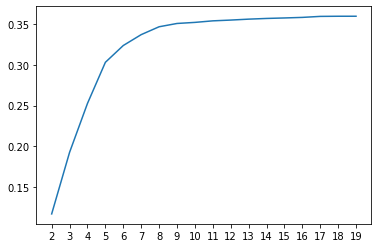

In [39]:
#进行卡方检验，P很大的组进行合并
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy

IV = []
axisx = []
while len(num_bins_) > 2:
    pvs = []
    #获取num_bins_两两之间的卡方检验的置信度
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回chi2值 1返回p值
        pv = scipy.stats.chi2_contingency([x1],[x2])[1]
        pvs.append(pv)
    #通过p值进行处理，合并p值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.show()

### 用得出的最佳分箱个数，并验证分箱结果

In [40]:
def get_bins(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        #获取num_bins_两两之间的卡方检验的置信度
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            # 0 返回chi2值 1返回p值
            pv = scipy.stats.chi2_contingency([x1],[x2])[1]
            pvs.append(pv)
        #通过p值进行处理，合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [41]:
afterbins = get_bins(num_bins,6)

In [42]:
afterbins

[(21.0, 58.0, 62466, 84084),
 (58.0, 61.0, 6664, 4845),
 (61.0, 64.0, 7014, 3197),
 (64.0, 68.0, 6658, 2388),
 (68.0, 74.0, 6793, 1873),
 (74.0, 109.0, 7661, 1365)]

In [43]:
bins_df = get_woe(num_bins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,58.0,62466,84084,146550,0.751508,0.573756,0.642284,0.860177,-0.292107
1,58.0,61.0,6664,4845,11509,0.059018,0.420975,0.068520,0.049564,0.323860
2,61.0,64.0,7014,3197,10211,0.052362,0.313094,0.072119,0.032705,0.790782
3,64.0,68.0,6658,2388,9046,0.046388,0.263984,0.068459,0.024429,1.030450
4,68.0,74.0,6793,1873,8666,0.044439,0.216132,0.069847,0.019161,1.293438
5,74.0,109.0,7661,1365,9026,0.046285,0.151230,0.078771,0.013964,1.730075


### 将选取最佳分箱个数包装成函数
    即将分箱的前四步封装到一个函数中

In [44]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [45]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


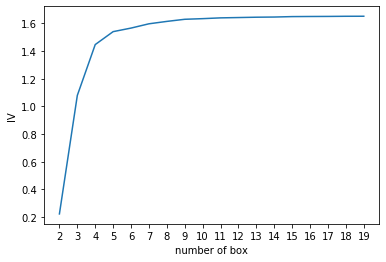

age


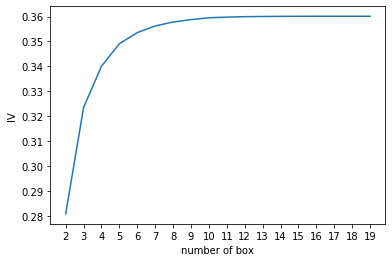

NumberOfTime30-59DaysPastDueNotWorse


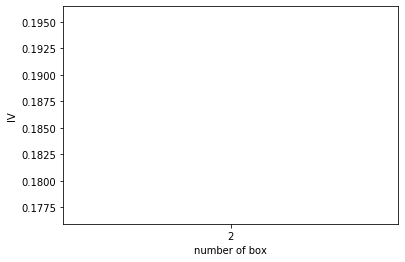

DebtRatio


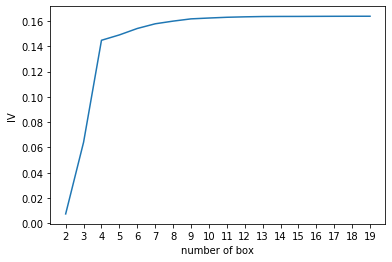

MonthlyIncome


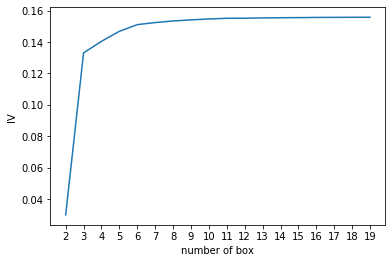

NumberOfOpenCreditLinesAndLoans


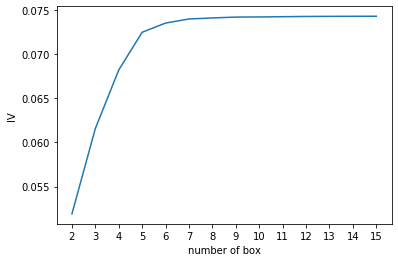

NumberOfTimes90DaysLate


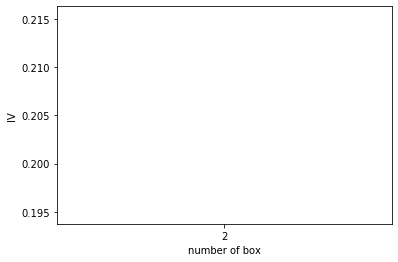

NumberRealEstateLoansOrLines


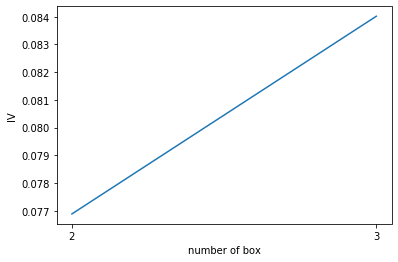

NumberOfTime60-89DaysPastDueNotWorse


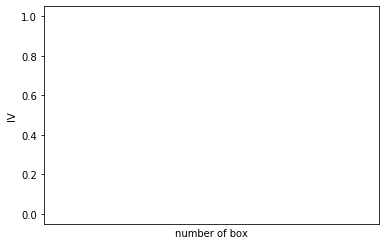

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [46]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=2,q=20)